In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

In [93]:
TOU_model = []
RTP_model_int=[]
for i in range(24):
    if i >= 17 and i <= 20:
        TOU_model.append(1)
    else:
         TOU_model.append(0.5)
for i in range(24):
    if i >= 17 and i <= 20:
        RTP_model_int.append (np.random.gamma(1, 1.0)/10)
    else:
        RTP_model_int.append (np.random.gamma(0.1,1.0)/10)
RTP_model = [x + 0.3 for x in RTP_model_int]

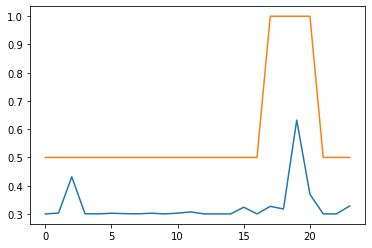

In [94]:
plt.plot(RTP_model)
plt.plot(TOU_model)

In [95]:
Num_of_hours = 24
Num_of_appliances = 3
EV=np.hstack([np.identity(Num_of_hours), np.zeros((Num_of_hours,Num_of_hours)),np.zeros((Num_of_hours,Num_of_hours))])
WM=np.hstack([np.zeros((Num_of_hours,Num_of_hours)), np.identity(Num_of_hours), np.zeros((Num_of_hours,Num_of_hours))])
Dish=np.hstack([np.zeros((Num_of_hours,Num_of_hours)),np.zeros((Num_of_hours,Num_of_hours)), np.identity(Num_of_hours)])

applinces= np.vstack([EV,WM,Dish])

zeros_list= [0] * Num_of_hours
schedule_EV =[]
schedule_WM =[]
schedule_Dish=[]

for i in range (1,Num_of_hours+1):
    schedule_EV.append(1) if i < 8 or i > 20 else schedule_EV.append(0)
    schedule_WM.append(0) if i > 20 or i < 8 else schedule_WM.append(1)
    schedule_Dish.append(0)if i >20 or i < 8 else schedule_Dish.append(1)

schedule_EV=schedule_EV+zeros_list +zeros_list
schedule_WM = zeros_list+ schedule_WM +zeros_list
schedule_Dish =zeros_list+ zeros_list+ schedule_Dish
schedule_conidtions=np.vstack([schedule_EV,schedule_WM,schedule_Dish])
schedule_applinces= np.vstack([schedule_conidtions,applinces])


In [96]:
Daily_consumption_EV= 9.9
Daily_consumption_WM= 1.94
Daily_consumption_Dish= 1.4
consumption=[]
for i in range ((Num_of_hours*Num_of_appliances)+ Num_of_appliances +2 ):
    if i==1:
        consumption.append (Daily_consumption_EV)
    elif i==2:
        consumption.append(Daily_consumption_WM)
    elif i==3:
        consumption.append(Daily_consumption_Dish)
    elif i> 3 and i < (Num_of_hours+Num_of_appliances+1):
        consumption.append(3)
    elif i >= (Num_of_hours+Num_of_appliances+1) and i < (Num_of_hours+Num_of_appliances+1+Num_of_hours):
        consumption.append(2.4)
    elif i> (Num_of_hours+Num_of_appliances+1+Num_of_hours):
        consumption.append(0.7)
            
max_cosumption=np.c_[consumption]

In [107]:
price= RTP_model + RTP_model + RTP_model 
price_model= np.c_[price]

In [125]:
obj=price
lhs_ineq =schedule_applinces [3:,:]
rhs_ineq = max_cosumption [3:]
lhs_eq = schedule_applinces [:3,:]
rhs_eq = max_cosumption[:3]

In [126]:
opt=linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, A_eq=lhs_eq, b_eq=rhs_eq, method="revised simplex")

In [127]:
print ('Optimized cosumption for the EV each hour:', np.round(opt.x [:25],2),
      '\nOptimized cosumption for the Washing Machine, each hour', np.round(opt.x [25:49],2),
       '\nOptimized cosumption for the DishWasher, each hour', np.round(opt.x [49:],2),
      '\nTotal Optamized cost for the household in NOK', np.round(opt.fun, 2))

Optimized cosumption for the EV each hour: [3.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.9 3.  0.  0. ] 
Optimized cosumption for the Washing Machine, each hour [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.94
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ] 
Optimized cosumption for the DishWasher, each hour [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.7 0.7 0.  0.  0.  0.
 0.  0.  0.  0.  0. ] 
Total Optamized cost for the household in NOK 3.97
